### Intensity Transformation Functions

The spatial domain processes can be denoted by the expression $$g(x,y) = T[f(x,y)]$$ where $f(x,y)$ is the input image, $g(x,y)$ is the output image, and $T$ is an operator on $f$ defined over a neighborhood of point $(x,y)$.

### Image Negatives
The negative of an image with intensity levels in the range $[0, L-1]$ is obtained by using the ngative transformation given by the expression $$s = L - 1 - r$$ Reversing the intensity levels of an image in this manner produces the equivalent of a photographic negative. This type of processing is particularly suited for enchancing white of gray detail embedded in dark regions of an image, especially when the black areas are dominant in size.

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

# read input image
img = cv2.imread("/home/gary/Documents/ECSE415_Fall2017/Assignment1/BreastDigitalMammogram.jpg", 0)
# copy image
img2 = img.copy()
img3 = img.copy()

# image dimensions
height, width = img.shape

# time algorithm
t0 = time.time()
# compute negative (for loop)
for row in range(0, height):
    for col in range(0, width):
        img2[row,col] = 255 - img2[row,col]
print("Elapsed time:", time.time() - t0)

# time algorithm
t0 = time.time()
# compute negative
img3 = 255 - img3
print("Elapsed time:", time.time() - t0)

# save image
cv2.imwrite("DigitalMammogramNegative.jpg", img2)

# display images
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Digital Mammogram"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2, cmap="gray")
plt.title("Negative Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img3, cmap="gray")
plt.title("Negative Image3"), plt.xticks([]), plt.yticks([])
plt.show()

AttributeError: 'NoneType' object has no attribute 'copy'

### Power-Law (Gamma) Transformation
Power-lay transformations have the basic form $$s = cr^\gamma$$ where c and $\gamma$ are positive constants. Power-law curves with fractional values of $\gamma$ map a narrow range of dark input values into a wider range of output values, with the opposite being true for higher values of input images. Notice there is a family of possible transformation curves obtained by simply varying $\gamma$.

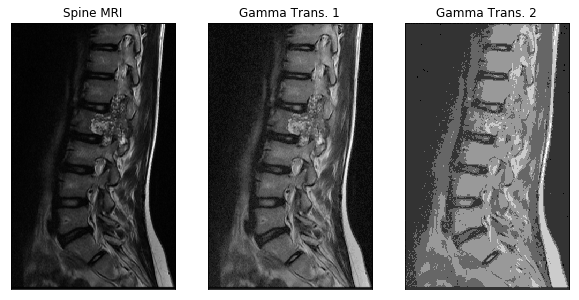

In [20]:
# read image
img = cv2.imread("/home/gary/Documents/ECSE415_Fall2017/Assignment1/LumbarSpineMRI.jpg", 0)

# image dimensions
height, width = img.shape

# copy images
img2 = img.copy()
img3 = img.copy()

# apply intensity transformation
for row in range(0, height):
    for col in range(0, width):
        img2[row, col] = 1 * img2[row, col] ** 0.6

# apply intensity transformation
for row in range(0, height):
    for col in range(0, width):
        img3[row, col] = 1 * img3[row, col] ** 0.3
        

# scale image in range [0,255]
f_m = img2 - img2.min()
f_s = 255 * (f_m / f_m.max()) 
# save image
cv2.imwrite("SpineMRI-Gamma.jpg", f_s)

# display images
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Spine MRI"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2, cmap="gray")
plt.title("Gamma Trans. 1"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img3, cmap="gray")
plt.title("Gamma Trans. 2"), plt.xticks([]), plt.yticks([])
plt.show()

### Intensity Level Slicing
Highlighting a specific range of intensities in an image is often of interest. This process, often called *intensity-level slicing*, can be implemented in several ways, but most are variations of two basic themes. One approach is to display in one value (white) all the values in the range of interest and in another (black) all other intensities. The second approach brightens the desired range of intensities but leaves all other intensity levels in the image unchanged.

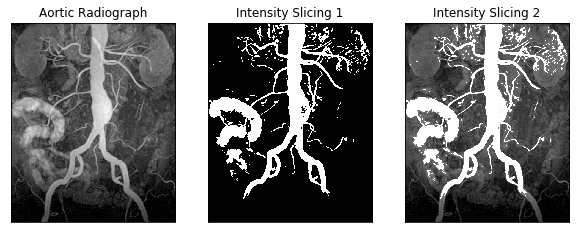

In [21]:
# read image
img = cv2.imread("/home/gary/Documents/ECSE415_Fall2017/Assignment1/AroticAneurysmRadiograph.jpg", 0)

# image dimensions
height, width = img.shape

# copy images
img2 = img.copy()
img3 = img.copy()

# slicing thresholds
thres1 = 120
thres2 = 240

# apply intensity level slicing
for row in range(0, height):
    for col in range(0, width):
        if img2[row,col] >= thres1 and img2[row,col] <= thres2:
            img2[row,col] = 255
        else:
            img2[row,col] = 0

# apply intensity level slicing
for row in range(0, height):
    for col in range(0, width):
        if img3[row,col] >= thres1 and img3[row,col] <= thres2:
            img3[row,col] = 255

# save image
cv2.imwrite("AoticBinary.jpg", img2)

# display images
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Aortic Radiograph"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2, cmap="gray")
plt.title("Intensity Slicing 1"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img3, cmap="gray")
plt.title("Intensity Slicing 2"), plt.xticks([]), plt.yticks([])
plt.show()

### Smoothing Linear Spatial Filters
Smoothing filters are used for blurring and for noise reduction. Blurring is used in preprocessing tasks, such as removal of small details from an image prior to (large) object extraction, and bridging of small gaps in lines or curvers.
The output of a smoothing, linear spatial filter is simply the average of the pixels contained in the neighborhood of the filter mask. These filters are called *averaging filters*.

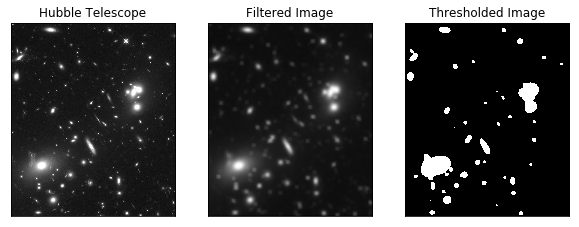

In [22]:
# read image
img = cv2.imread("/home/gary/Documents/ECSE415_Fall2017/Assignment1/HubbleSpaceTelescope.jpg", 0)

# image dimensions
height, width = img.shape

# create kernel
ksize = 15
kernel = np.ones((ksize,ksize), dtype=np.float32) / (ksize*ksize)
offset = int((ksize-1)/2)

# pad image
img_pad = np.zeros((height+ksize-1, width+ksize-1))
img_pad[offset:-offset, offset:-offset] = img

# filter image
img_filter = np.zeros((height, width))
for row in range(offset, height+offset):
    for col in range(offset, width+offset):
        total = np.sum(img_pad[row-offset:row+offset+1, col-offset:col+offset+1] * kernel)
        img_filter[row-offset,col-offset] = total

# threshold image
img_thres = np.zeros((height, width))
thres = 80
for row in range(0, height):
    for col in range(0, width):
        if img_filter[row, col] >= thres:
            img_thres[row, col] = 1

# scale image in range [0,255]
f_m = img_thres - img_thres.min()
f_s = 255 * (f_m / f_m.max()) 
# save image
cv2.imwrite("HubbleTelescopeBinary.jpg", f_s)
             
# display images
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Hubble Telescope"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_filter, cmap="gray")
plt.title("Filtered Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thres, cmap="gray")
plt.title("Thresholded Image"), plt.xticks([]), plt.yticks([])
plt.show()

### First-Order Derivatives
First-order derivatives in image processing are implemented using the magnitude of the gradient.

In [1]:
# read image
img = cv2.imread("/home/gary/Documents/ECSE415_Fall2017/Assignment1/SatelliteImage.jpg", 0)

# image dimensions
height, width = img.shape

# blur image
img_blur = cv2.GaussianBlur(img, (9,9), 0)

# create kernel
ksize = 3
sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
offset = int((ksize-1)/2)

# pad image
img_pad = np.zeros((height+ksize-1, width+ksize-1))
img_pad[offset:-offset, offset:-offset] = img

# filter image (sobel x)
Ix = np.zeros((height, width))
for row in range(offset, height+offset):
    for col in range(offset, width+offset):
        total = np.sum(img_pad[row-offset:row+offset+1, col-offset:col+offset+1] * sobel_x)
        Ix[row-offset,col-offset] = total
print(Ix.dtype)
# filter image (sobel y)
Iy = np.zeros((height, width))
for row in range(offset, height+offset):
    for col in range(offset, width+offset):
        total = np.sum(img_pad[row-offset:row+offset+1, col-offset:col+offset+1] * sobel_y)
        Iy[row-offset,col-offset] = total

# gradient magnitude
Ig = np.sqrt(Ix**2 + Iy**2)

# scale image in range [0,255]
f_m = Ig - Ig.min()
f_s = 255 * (f_m / f_m.max()) 

# threshold image
img_thres = np.zeros((height, width))
thres = 15
for row in range(0, height):
    for col in range(0, width):
        if f_s[row, col] >= thres:
            img_thres[row, col] = 1

# scale image in range [0,255]
f_m = img_thres - img_thres.min()
f_s = 255 * (f_m / f_m.max()) 
            
# save image
cv2.imwrite("SatelliteEdges.jpg", f_s)
            
# display images
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img, cmap="gray")
plt.title("SatelliteImage"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(Ix, cmap="gray")
plt.title("Ix"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(Iy, cmap="gray")
plt.title("Iy"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_thres, cmap="gray")
plt.title("Thresholded Gradient"), plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'cv2' is not defined

### Sharpening Spatial Filter
The principal objective of sharpening is to highlight transitions in intensity. Last question we saw that image blurring could be accomplished in the spatial domain by pixel averaging in a neighborhood. Because averaging is analogous to integration, it is logical to conclude that sharpening can be accomplished by spatial differentiation.
For this question, we consider the implementation of 2-D, second-order derivatives and their use for image sharpening.
Because the Laplacian is a derivative operator, its use highlights intensity discontinuities in an image and deemphasizes regions with slowly varying intensity levels. This will tend to produce images that have grayish edge lines and other discontinuities, all superimposed on a dark, featureless background. Background features can be "recovered" while still preserving the sharpening effect of the Laplacian simply by adding the Laplacian image to the original. Thus, the basic way in which we use the Laplacian for image sharpening is: $$g(x,y) = f(x,y) + c[\nabla^2 f(x,y)]$$ where $f(x,y)$ and $g(x,y)$ are the input and sharpened images, respectively.

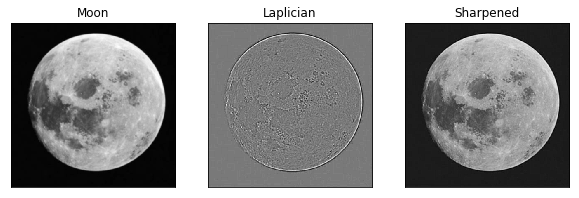

In [24]:
# read image
img = cv2.imread("/home/gary/Documents/ECSE415_Fall2017/Assignment1/Moon.jpg", 0)

# image dimensions
height, width = img.shape

# create laplacian kernel
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
ksize = 3
offset = int((ksize-1)/2)

# pad image
img_pad = np.zeros((height+ksize-1, width+ksize-1))
img_pad[offset:-offset, offset:-offset] = img
        
# filter image
img_filt = np.zeros((height, width))
for row in range(offset, height+offset):
    for col in range(offset, width+offset):
        total = np.sum(img_pad[row-offset:row+offset+1, col-offset:col+offset+1] * kernel)
        img_filt[row-offset, col-offset] = total

# scale image in range [0,255]
f_m = img_filt - img_filt.min()
f_s = 255 * (f_m / f_m.max()) 

# apply Laplacian sharpening
c = 0.33
img_sharp = img + c * f_s

# save image
cv2.imwrite("MoonLaplacian.jpg", img_filt)
cv2.imwrite("MoonSharp.jpg", img_sharp)

# display images
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Moon"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_filt, cmap="gray")
plt.title("Laplician"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_sharp, cmap="gray")
plt.title("Sharpened"), plt.xticks([]), plt.yticks([])
plt.show()